[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.  Zeitreihen-Transformation



(source: https://www.math.umd.edu/~petersd/666/html/cossin_example.html)

FLUCCOplus

In [241]:
# OPTIONAL: Load the "autoreload" extension so that code can change
import pandas as pd
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [242]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [243]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.transform as traffo
import FLUCCOplus.scenarios as scens
from FLUCCOplus.scenarios import Scenario
from FLUCCOplus.utils import *
import FLUCCOplus.electricitymap as elmap
from FLUCCOplus.plots import *
import os

In [244]:
if not os.path.exists("..\data\Plots"):
        os.makedirs("..\data\Plots")

In [245]:
# Skalierungen

In [246]:
sc = scens.all()
print(*[i+k for i,k in zip([i for i in sc.index], ["\n"]*len(sc.index))])

EM2018
 EM2019
 E-Control 2019
 Energie und Klimazukunft 2030 (Veigl17)
 Erneuerbare Energie 2030 (UBA16)
 WEM 2030 (UBA17)
 Transition 2030 (UBA17)
 Energie und Klimazukunft 2050 (Veigl17)
 Erneuerbare Energie 2050 (UBA16)
 WEM 2050 (UBA17)
 Transition 2050 (UBA17)
 100% Erneuerbare Deckung 2050 (FLUCCO+)
 100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)



C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [247]:
em_year = 2018 # 2015, 2016, 2017, 2018

In [248]:
#name = "EM2018"
#name = "EM2019"
#name = "E-Control 2019"
#name = "Energie und Klimazukunft 2030 (Veigl17)"
#name = "Erneuerbare Energie 2030 (UBA16)"
#name = "WEM 2030 (UBA17)"
#name = "Transition 2030 (UBA17)"
#name = "Energie und Klimazukunft 2050 (Veigl17)"
#name = "Erneuerbare Energie 2050 (UBA16)"
#name = "WEM 2050 (UBA17)"
name = "Transition 2050 (UBA17)"
#name = "100% Erneuerbare Deckung 2050 (FLUCCO+)"
#name = "100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)"

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


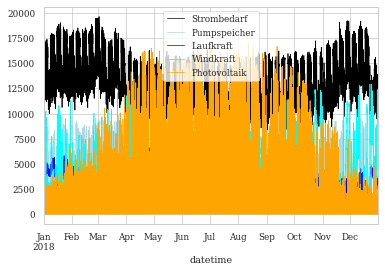

In [249]:
scaled = Scenario(
    name = name, # can be anything
    scenario = name, # must be a scenario name
    em_base = {"year": em_year,
               "df": elmap.fetch(year=em_year)})
scaled.plot()

In [250]:
scaled.TSD

,Strombedarf,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik
datetime,,,,,
2018-01-01 00:00:00+00:00,10937.139183,37.988053,3561.900131,3695.100904,0.0
2018-01-01 01:00:00+00:00,10491.288131,0.000000,3488.519370,4106.287478,0.0
2018-01-01 02:00:00+00:00,9905.855104,0.000000,3372.705745,3064.757465,0.0
2018-01-01 03:00:00+00:00,9903.119435,0.000000,3365.251075,2008.823313,0.0
2018-01-01 04:00:00+00:00,10188.084889,0.000000,3546.026825,1423.793688,0.0
...,...,...,...,...,...
2018-12-31 19:00:00+00:00,12188.471621,123.458938,3180.114526,2425.702769,0.0
2018-12-31 20:00:00+00:00,11664.549827,76.721754,3079.338304,2249.975258,0.0
2018-12-31 21:00:00+00:00,11644.419508,202.258336,3056.322936,1891.412391,0.0


In [251]:
df = scaled.TSD
#dates = np.arange("2019-01-01","2020-01-01 00:00", dtype="datetime64[h]")
#df["timestamp"] = 0
df["timestamp"] = df.index
df = df.set_index('timestamp').resample('H').ffill()
df

,Strombedarf,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik
timestamp,,,,,
2018-01-01 00:00:00+00:00,10937.139183,37.988053,3561.900131,3695.100904,0.0
2018-01-01 01:00:00+00:00,10491.288131,0.000000,3488.519370,4106.287478,0.0
2018-01-01 02:00:00+00:00,9905.855104,0.000000,3372.705745,3064.757465,0.0
2018-01-01 03:00:00+00:00,9903.119435,0.000000,3365.251075,2008.823313,0.0
2018-01-01 04:00:00+00:00,10188.084889,0.000000,3546.026825,1423.793688,0.0
...,...,...,...,...,...
2018-12-31 19:00:00+00:00,12188.471621,123.458938,3180.114526,2425.702769,0.0
2018-12-31 20:00:00+00:00,11664.549827,76.721754,3079.338304,2249.975258,0.0
2018-12-31 21:00:00+00:00,11644.419508,202.258336,3056.322936,1891.412391,0.0


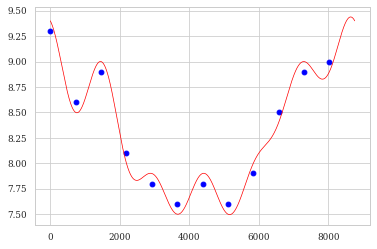

In [252]:
# define timeframe (of periodicity) of scaler
h = 8760 #hours of periodic timeframe

p = np.array([9.3, 8.6, 8.9, 8.1, 7.8, 7.6, 7.8, 7.6, 7.9, 8.5, 8.9, 9.0])
s_year = traffo.transform(p)

def plot(timeseries, supports, h=8760,):

    x = np.arange(0, h, h/len(supports))
    xh = np.arange(0,h,1)
    plt.plot(x, supports, "bo")
    plt.plot(xh, timeseries, "r")
plot(s_year, p)


## Beispielanwendung:
### Temperaturglättung Donauwasser

In [253]:
#h = 8760 #hours of periodic timeframe

# Monatsmitteltemperaturen
#p = np.array([19.3, 18.1, 17.7, 12.1, 7.6, 4, 0.2, 2.8, 7.4, 10.7, 13.8, 19.8])
#s_year = traffo.transform(p)
#plot(s_year, p)

# Transformation

In [254]:
df_base= elmap.fetch(year=em_year)
df_base = df_base.rename(columns=EM_TO_EXCEL_colnames)

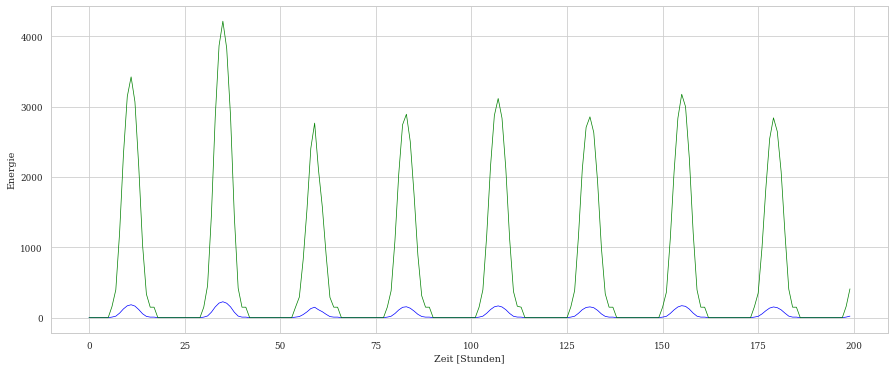

In [255]:
plot_comp(df_base.Photovoltaik, scaled.TSD.Photovoltaik, start=0, stop=200)

## Lastprofile
PV_SUED: Der default PV-Erzeugung, die eingelesen wird.
PV_OST_WEST: die Kurve von PV_SUED wird mit den Faktoren geändert, somit es keine Spitzenzeit am Mittag vorhanden ist, sondern ...
BATTERIESPEICHER: Die Kurve der PV-Erzeugung wird manipuliert, als ein Batteriespeicher vorhanden wäre
VERBRAUCH_DSM: Es wird den täglichen Stromverbrauchsverlauf geändert
VERBRAUCH_SAISONAL: Dadurch wird ein geänderter jährlicher Strombedarf simuliert

In [256]:

# vordefinierte transformationen, die dann auch im bericht beschrieben sind und inhaltlich motiviert

PV_SUED = {
    "type": "Photovoltaik",
    "weights": [1,1,1,1,1,1,1,1],
    "timeframe": 24
}

PV_OST_WEST = {
    "type": "Photovoltaik",
    "weights": [1.1,1,0.9,0.6,0.6,0.9,1,1.1],
    "timeframe": 24
}

BATTERIESPEICHER = {
    "type": "Photovoltaik",
    "weights": [1.1,1,1,0.6,0.6,0.8,1.1,1.1],
    "timeframe": 24
}

VERBRAUCH_DSM = {
    "type": "Strombedarf",
    "weights": [1.1, 1.1, 2, 2, 1.1, 1.1],
    "timeframe": 24
}

VERBRAUCH_SAISONAL = {
    "type": "Strombedarf", #?? name
    "weights": [1.1,1.3, 2, 2, 1.3, 1.1],
    "timeframe": 8760
}

# transformation scen arios 0 are contaioners for a number of predefined transformations that should be applied
grundscenario = []
scenario1 = [
    PV_OST_WEST
]

scenario2 = [
    PV_OST_WEST,
    VERBRAUCH_SAISONAL
]

scenario3 = [
    BATTERIESPEICHER
]

scenario4 = [
    PV_OST_WEST,
    VERBRAUCH_DSM
]

scaled.reset()
#scaled.apply(scenario1)
scaled.apply(scenario2)
#scaled.apply(scenario3)

In [257]:
scaled.TSD["RES"] = scaled.TSD.Pumpspeicher + scaled.TSD.Laufkraft + scaled.TSD.Windkraft + scaled.TSD.Photovoltaik

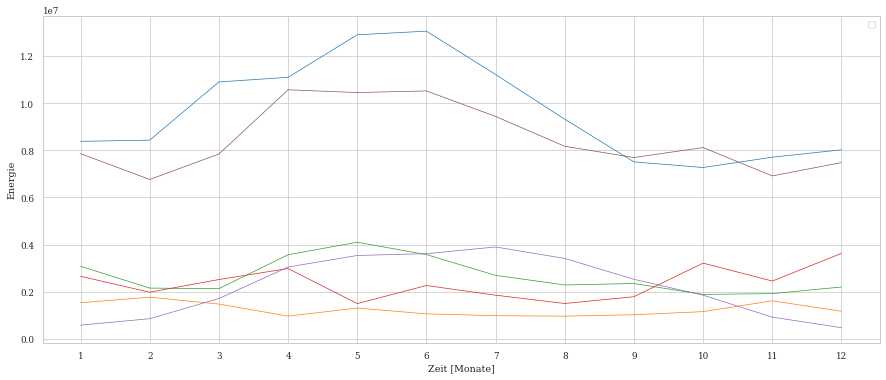

In [258]:
plot_monthly(scaled.TSD) # legende + Farbe zuweisen

<AxesSubplot:xlabel='datetime'>

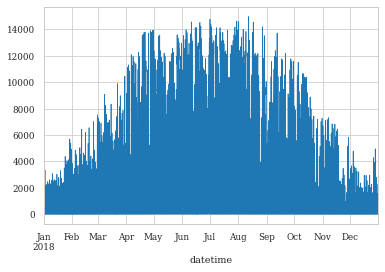

In [259]:
SB_transformed = scaled.TSD.Strombedarf.copy()
PV_transformed = scaled.TSD.Photovoltaik.copy()
PV_transformed.plot()

<AxesSubplot:xlabel='datetime'>

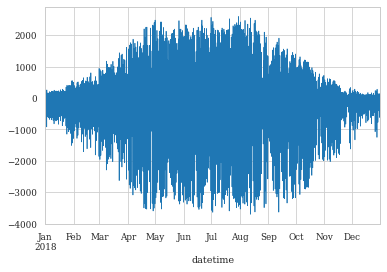

In [260]:
scaled.reset() # es wird zurückgestellt
(PV_transformed-scaled.TSD.Photovoltaik).plot() # änderung durch die transformation

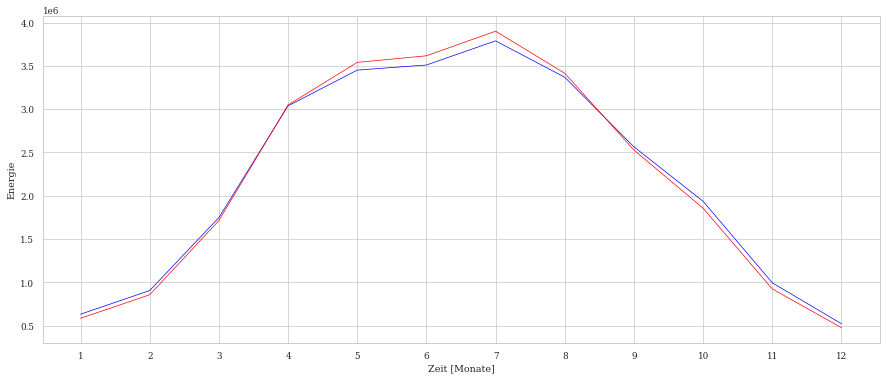

In [261]:
plot_monthly_comp(scaled.TSD.Photovoltaik, PV_transformed) # eine Legende fehlt noch

<AxesSubplot:xlabel='datetime'>

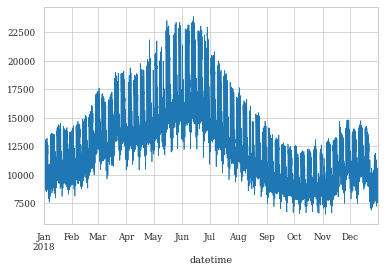

In [262]:
SB_transformed.plot()

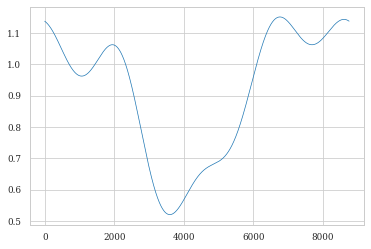

In [263]:
#plt.plot(VERBRAUCH_SAISONAL["weights"])
plt.plot(traffo.transform(BATTERIESPEICHER["weights"]))

# Analysis

In [264]:
scaled.reset()
scaled.apply(scenario2)

In [265]:
from FLUCCOplus.utils import *
df= scaled.TSD
Ueberschuesse_PVfirst(df)

H:\FLUCCOplus\FLUCCOplus\utils.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WindkraftUeSch[t] = 0
H:\FLUCCOplus\FLUCCOplus\utils.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PVUeSch[t] = 0
H:\FLUCCOplus\FLUCCOplus\utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WindkraftDV[t] = df.Windkraft[t]
H:\FLUCCOplus\FLUCCOplus\utils.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,Strombedarf,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik,timestamp,RES,Non_volatiles,RESohneWind,Residual_ohne_Wind,Zero,Wind_useful,WindkraftUeSch,WindkraftDV,WindkraftLast,PVUeSch,PVDV
datetime,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,8329.831086,37.988053,3561.900131,3695.100904,0.0,2018-01-01 00:00:00+00:00,7294.989088,3599.888184,3599.888184,4729.942902,0,3695.100904,0,3695,0,0,0
2018-01-01 01:00:00+00:00,7990.116424,0.000000,3488.519370,4106.287478,0.0,2018-01-01 01:00:00+00:00,7594.806848,3488.519370,3488.519370,4501.597054,0,4106.287478,0,4106,0,0,0
2018-01-01 02:00:00+00:00,7544.111954,0.000000,3372.705745,3064.757465,0.0,2018-01-01 02:00:00+00:00,6437.463210,3372.705745,3372.705745,4171.406209,0,3064.757465,0,3064,0,0,0
2018-01-01 03:00:00+00:00,7541.887587,0.000000,3365.251075,2008.823313,0.0,2018-01-01 03:00:00+00:00,5374.074388,3365.251075,3365.251075,4176.636512,0,2008.823313,0,2008,0,0,0
2018-01-01 04:00:00+00:00,7758.763274,0.000000,3546.026825,1423.793688,0.0,2018-01-01 04:00:00+00:00,4969.820514,3546.026825,3546.026825,4212.736449,0,1423.793688,0,1423,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+00:00,9283.737922,123.458938,3180.114526,2425.702769,0.0,2018-12-31 19:00:00+00:00,5729.276233,3303.573464,3303.573464,5980.164458,0,2425.702769,0,2425,0,0,0
2018-12-31 20:00:00+00:00,8884.506811,76.721754,3079.338304,2249.975258,0.0,2018-12-31 20:00:00+00:00,5406.035317,3156.060058,3156.060058,5728.446752,0,2249.975258,0,2249,0,0,0
2018-12-31 21:00:00+00:00,8869.005594,202.258336,3056.322936,1891.412391,0.0,2018-12-31 21:00:00+00:00,5149.993664,3258.581272,3258.581272,5610.424321,0,1891.412391,0,1891,0,0,0


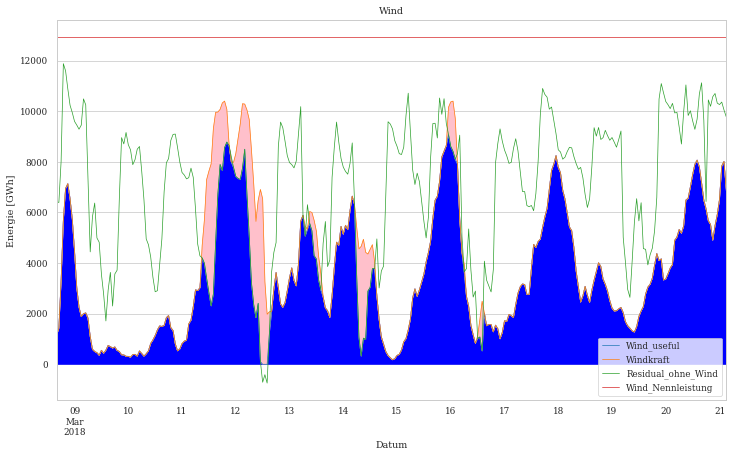

In [266]:
df["Wind_Nennleistung"] = df.Windkraft.max()
df[["Wind_useful", "Windkraft","Residual_ohne_Wind","Wind_Nennleistung"]].iloc[1600:1900,:].plot(figsize=(12,7)).set(title="Wind", xlabel="Datum", ylabel="Energie [GWh]")
plt.fill_between(df.index, df["Zero"], df["Wind_useful"], color='blue')
plt.fill_between(df.index, df["Wind_useful"], df["Windkraft"], color='pink')

Wind_rel -> Verhältnis zw. Windkrafterzeugung zur installierten Nennleistung in %
windrel -> Überschuss von Windkraft

[Text(0.5, 1.0, 'Wind'),
 Text(0.5, 0, 'Datum'),
 Text(0, 0.5, 'Windkraftüberschuss zur installierten Nennleistung')]

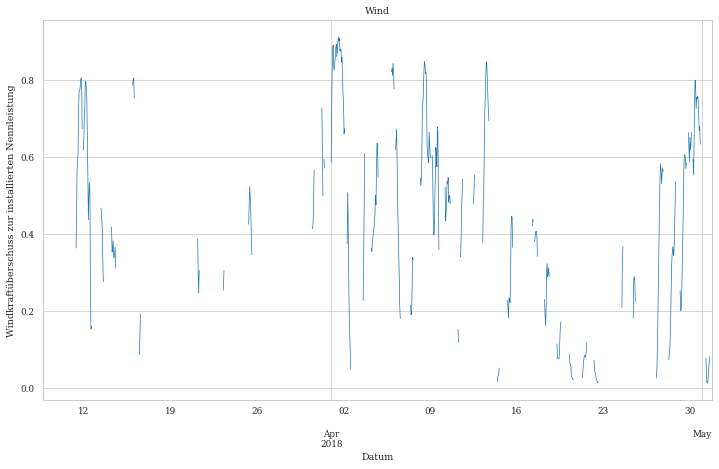

In [267]:
df["Wind_rel"] = df.Windkraft / df.Windkraft.max() # in % der Nennleistung
df_windrel= df.Wind_rel.where(df.Windkraft > df.Wind_useful)
df_windrel.iloc[1600:2900].plot(figsize=(12,7)).set(title="Wind", xlabel="Datum", ylabel="Windkraftüberschuss zur installierten Nennleistung")  # zeitpunkte mit "freigabesignal, weil wind > res_ohne_wind

In [268]:
df_s1 = df_windrel.loc[(df_windrel.index.month >= 4) & (df_windrel.index.month < 7)]
df_s2 = df_windrel.loc[(df_windrel.index.month >= 7) & (df_windrel.index.month < 10)]
df_w1 = df_windrel.loc[(df_windrel.index.month < 4)]
df_w2 = df_windrel.loc[(df_windrel.index.month >= 10)]
df_s1

datetime
2018-04-01 00:00:00+00:00    0.585603
2018-04-01 01:00:00+00:00    0.725443
2018-04-01 02:00:00+00:00    0.823762
2018-04-01 03:00:00+00:00    0.882584
2018-04-01 04:00:00+00:00    0.889867
                               ...   
2018-06-30 19:00:00+00:00         NaN
2018-06-30 20:00:00+00:00         NaN
2018-06-30 21:00:00+00:00         NaN
2018-06-30 22:00:00+00:00         NaN
2018-06-30 23:00:00+00:00         NaN
Name: Wind_rel, Length: 2184, dtype: float64

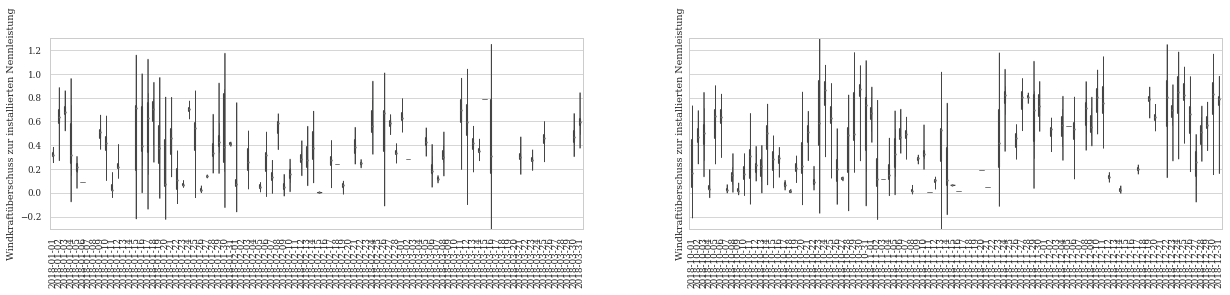

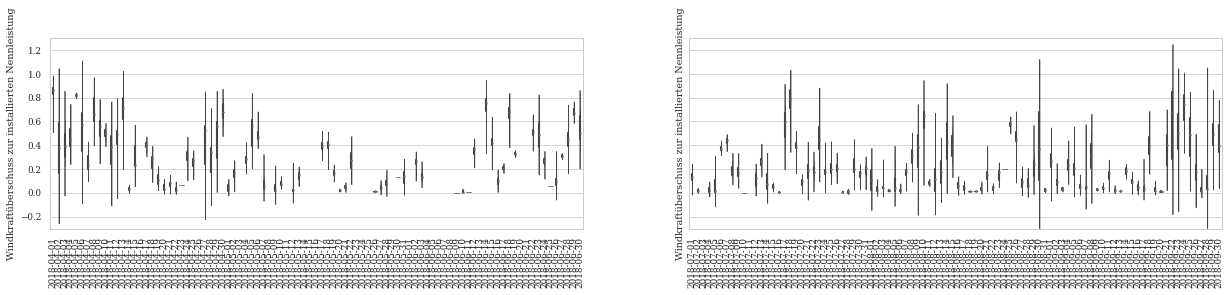

In [269]:
import seaborn as sns
fig, ax = plt.subplots(1,2,sharey=True, figsize=(21,3.5))
sns.violinplot(x=df_w1.index.date, y=df_w1, ax=ax[0]).set(ylabel="Windkraftüberschuss zur installierten Nennleistung")
sns.violinplot(x=df_w2.index.date, y=df_w2, ax=ax[1]).set(ylabel="Windkraftüberschuss zur installierten Nennleistung")
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_ylim([-0.3, 1.3])
ax[1].set_ylim([-0.3, 1.3])
fig.savefig(f"../data/Plots/PV_First_Windverlauf_{em_year}_w.png", dpi=300, bbox_inches='tight')
fig, ax = plt.subplots(1,2,sharey=True, figsize=(21,3.5))
sns.violinplot(x=df_s1.index.date, y=df_s1, ax=ax[0]).set(ylabel="Windkraftüberschuss zur installierten Nennleistung")
sns.violinplot(x=df_s2.index.date, y=df_s2, ax=ax[1]).set(ylabel="Windkraftüberschuss zur installierten Nennleistung")
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_ylim([-0.3, 1.3])
ax[1].set_ylim([-0.3, 1.3])
fig.savefig(f"../data/Plots/PV_First_Windverlauf_{em_year}_s.png", dpi=300, bbox_inches='tight')

## PV First

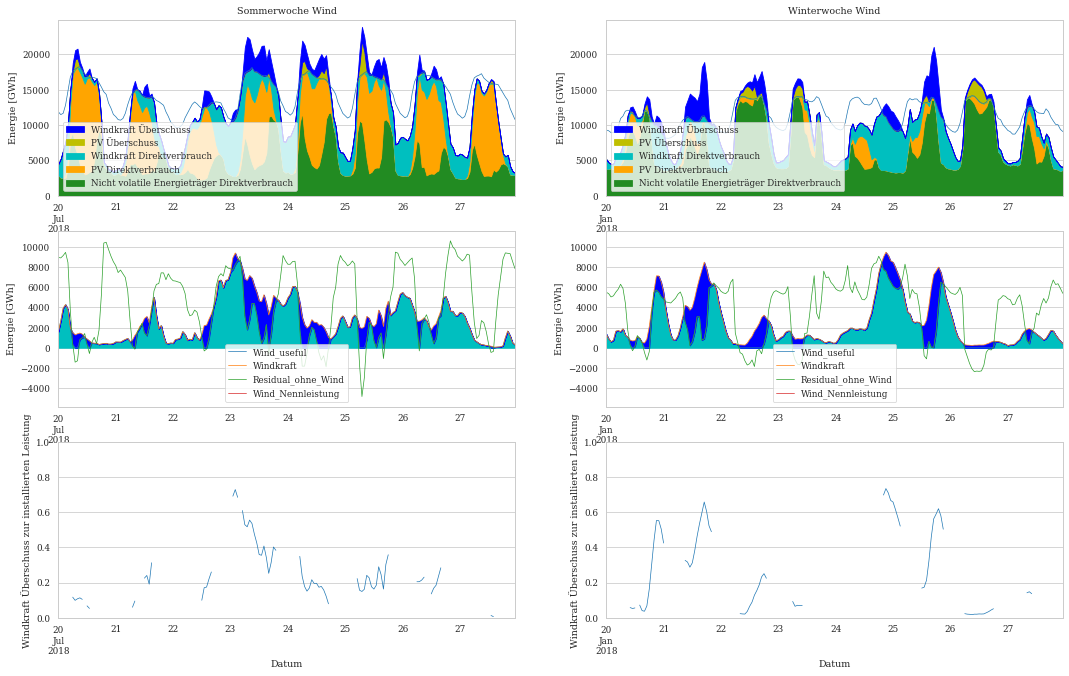

In [270]:
fig, ax = plot_analyse_PVfirst(df, summerweek_start=f"{em_year}-07-20", summerweek_stop= f"{em_year}-07-27", winterweek_start=f"{em_year}-01-20", winterweek_stop=f"{em_year}-01-27")
fig.savefig(f"../data/Plots/PV_First_Vergleich_{em_year}.png", dpi=300, bbox_inches='tight')

In [271]:
cutoffs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
anzahl = pd.DataFrame()

for i, x in enumerate(cutoffs):
    sig = df_windrel.where(df_windrel > x)
    sig = pd.DataFrame(sig)
    anzahl[x] = sig.count()

In [272]:
df_sign_wind = pd.DataFrame()
df_sign = pd.DataFrame()
df_sign["Windrel"] = df_windrel
df_sign["Cut off 10%"] = df_sign["Windrel"].where(df_sign.Windrel > 0.1)
df_sign["Cut off 20%"] = df_sign["Windrel"].where(df_sign.Windrel > 0.2)
df_sign["Cut off 30%"] = df_sign["Windrel"].where(df_sign.Windrel > 0.3)
df_sign["Cut off 40%"] = df_sign["Windrel"].where(df_sign.Windrel > 0.4)
df_sign["Cut off 50%"] = df_sign["Windrel"].where(df_sign.Windrel > 0.5)
df_sign["Cut off 60%"] = df_sign["Windrel"].where(df_sign.Windrel > 0.6)
df_sign.fillna(0, inplace=True)
for c in df_sign.columns:
    df_sign[c] = df_sign[c].map(lambda x: -1 if x ==0 else 1)

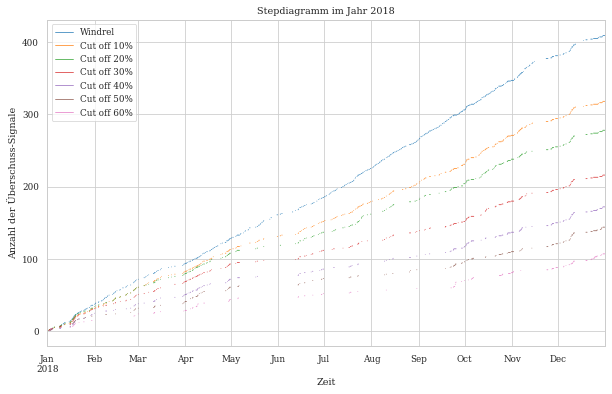

In [273]:
df_step_wind = pd.DataFrame()
df_not_wind = pd.DataFrame()

for c in df_sign.columns:
    df_step_wind[c] = df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==1).cumsum()
    df_not_wind[c] = df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==-1).cumsum()
df_step_wind.iloc[0,:] = 0

fig, ax = plt.subplots()
df_step_wind.plot(figsize=(10,6), grid=True, ax=ax).set(title=f"Stepdiagramm im Jahr {em_year}", xlabel="Zeit", ylabel="Anzahl der Überschuss-Signale")
fig.savefig(f"../data/Plots/PV_First_Stepdiagramm_{em_year}.png", dpi=300, bbox_inches='tight')

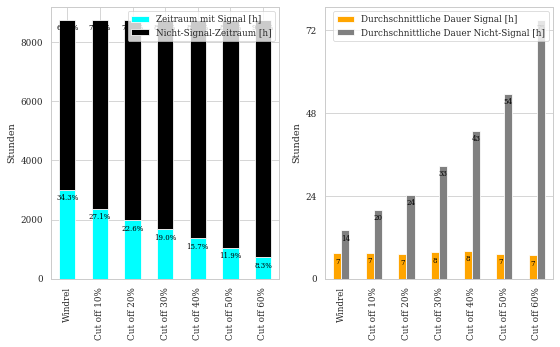

In [274]:
fig, ax = plot_signal_bars(df_sign, df_sign.columns, ytick_average_max=73, figsize=(9,5))
fig.savefig(f"../data/Plots/PV_First_Signaldiagramm_{em_year}.png", dpi=300, bbox_inches='tight')

In [275]:
df_wind_sign_s = df_sign.loc[(df_sign.index.month >= 4) & (df_sign.index.month < 10)]
df_wind_sign_w = df_sign.loc[(df_sign.index.month >= 10) | (df_sign.index.month < 4)]

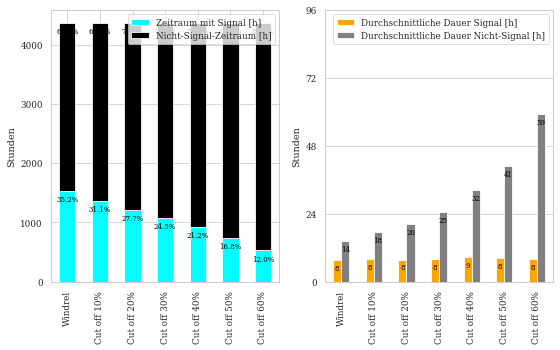

In [276]:
fig, ax = plot_signal_bars(df_wind_sign_w, df_wind_sign_w.columns, ytick_average_max=97, figsize=(9,5))
fig.savefig(f"../data/Plots/PV_First_Signaldiagramm_{em_year}_w.png", dpi=300, bbox_inches='tight')

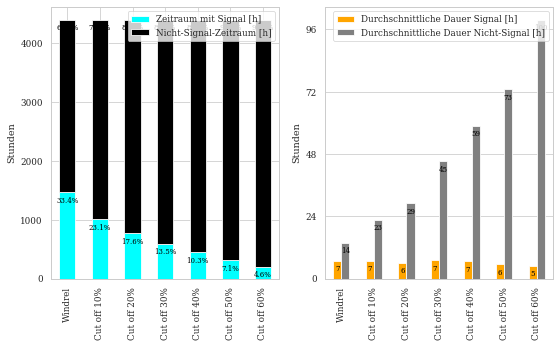

In [277]:
fig, ax = plot_signal_bars(df_wind_sign_s, df_wind_sign_s.columns, ytick_average_max=97, figsize=(9,5))
fig.savefig(f"../data/Plots/PV_First_Signaldiagramm_{em_year}_s.png", dpi=300, bbox_inches='tight')

In [278]:
df_monthly = df[["WindkraftDV"]].resample("M").sum()


In [279]:
#fig, ax = plt.subplots()
#df[["WindkraftDV", "WindkraftUeSch"]].resample("M").sum().plot(kind="bar", color=["c", "blue"], stacked=True, ax=ax, figsize=(12,5))
#for p in ax.patches:
#    ax.annotate("{:.1f}%".format(p.get_height()*100/(df_monthly["WindkraftDV"][0])), ###passt nincht
#                       (p.get_x() + p.get_width() / 2., p.get_height() + p.get_y() - 5), ha='center', va='center',
 #                      fontsize=7, color='black', xytext=(0, -8), textcoords='offset points')
#fig.savefig(f"../data/Plots/PV_First_WIND_stacked_{em_year}.png", dpi=300, bbox_inches='tight')


## Wind First

In [280]:
from FLUCCOplus.utils import *
df2= scaled.TSD
Ueberschuesse_WINDfirst(df2)

H:\FLUCCOplus\FLUCCOplus\utils.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.WindkraftDV[t] = df2.Windkraft[t]
H:\FLUCCOplus\FLUCCOplus\utils.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.PVUeSch[t] = 0
H:\FLUCCOplus\FLUCCOplus\utils.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.PVDV[t] = df2.Photovoltaik[t]
H:\FLUCCOplus\FLUCCOplus\utils.py:162: SettingWithCopyWarning: 
A value is trying to be set o

,Strombedarf,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik,timestamp,RES,Non_volatiles,RESohneWind,Residual_ohne_Wind,...,WindkraftUeSch,WindkraftDV,WindkraftLast,PVUeSch,PVDV,Wind_Nennleistung,Wind_rel,PVLast,RESohnePV,Residual_ohne_PV
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,8329.831086,37.988053,3561.900131,3695.100904,0.0,2018-01-01 00:00:00+00:00,7294.989088,3599.888184,3599.888184,4729.942902,...,0,3695,0,0,0,12922.333864,0.285947,0,7294.989088,4729.942902
2018-01-01 01:00:00+00:00,7990.116424,0.000000,3488.519370,4106.287478,0.0,2018-01-01 01:00:00+00:00,7594.806848,3488.519370,3488.519370,4501.597054,...,0,4106,0,0,0,12922.333864,0.317767,0,7594.806848,4501.597054
2018-01-01 02:00:00+00:00,7544.111954,0.000000,3372.705745,3064.757465,0.0,2018-01-01 02:00:00+00:00,6437.463210,3372.705745,3372.705745,4171.406209,...,0,3064,0,0,0,12922.333864,0.237167,0,6437.463210,4171.406209
2018-01-01 03:00:00+00:00,7541.887587,0.000000,3365.251075,2008.823313,0.0,2018-01-01 03:00:00+00:00,5374.074388,3365.251075,3365.251075,4176.636512,...,0,2008,0,0,0,12922.333864,0.155454,0,5374.074388,4176.636512
2018-01-01 04:00:00+00:00,7758.763274,0.000000,3546.026825,1423.793688,0.0,2018-01-01 04:00:00+00:00,4969.820514,3546.026825,3546.026825,4212.736449,...,0,1423,0,0,0,12922.333864,0.110181,0,4969.820514,4212.736449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+00:00,9283.737922,123.458938,3180.114526,2425.702769,0.0,2018-12-31 19:00:00+00:00,5729.276233,3303.573464,3303.573464,5980.164458,...,0,2425,0,0,0,12922.333864,0.187714,0,5729.276233,5980.164458
2018-12-31 20:00:00+00:00,8884.506811,76.721754,3079.338304,2249.975258,0.0,2018-12-31 20:00:00+00:00,5406.035317,3156.060058,3156.060058,5728.446752,...,0,2249,0,0,0,12922.333864,0.174115,0,5406.035317,5728.446752
2018-12-31 21:00:00+00:00,8869.005594,202.258336,3056.322936,1891.412391,0.0,2018-12-31 21:00:00+00:00,5149.993664,3258.581272,3258.581272,5610.424321,...,0,1891,0,0,0,12922.333864,0.146368,0,5149.993664,5610.424321


In [281]:
df2["Wind_Nennleistung"] = df2.Windkraft.max()
df2["Wind_rel"] = df2.WindkraftUeSch / df2.Windkraft.max() # in % der Nennleistung
df2_windrel= df2.Wind_rel

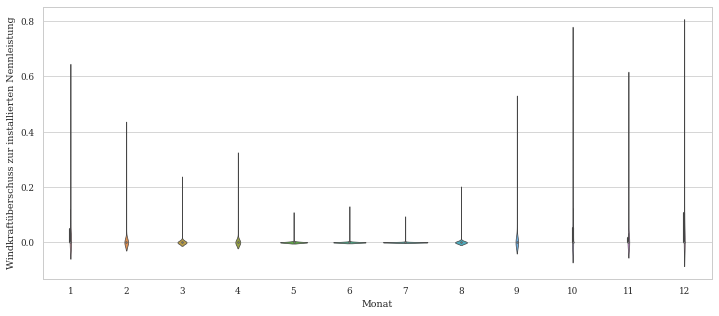

In [282]:
fig, ax = plt.subplots(figsize=(12,5))
sns.violinplot(x=df2_windrel.index.month, y=df2_windrel, ax=ax).set(xlabel="Monat", ylabel="Windkraftüberschuss zur installierten Nennleistung")
fig.savefig(f"../data/Plots/WIND_First_Violin_{em_year}.png", dpi=300, bbox_inches='tight')

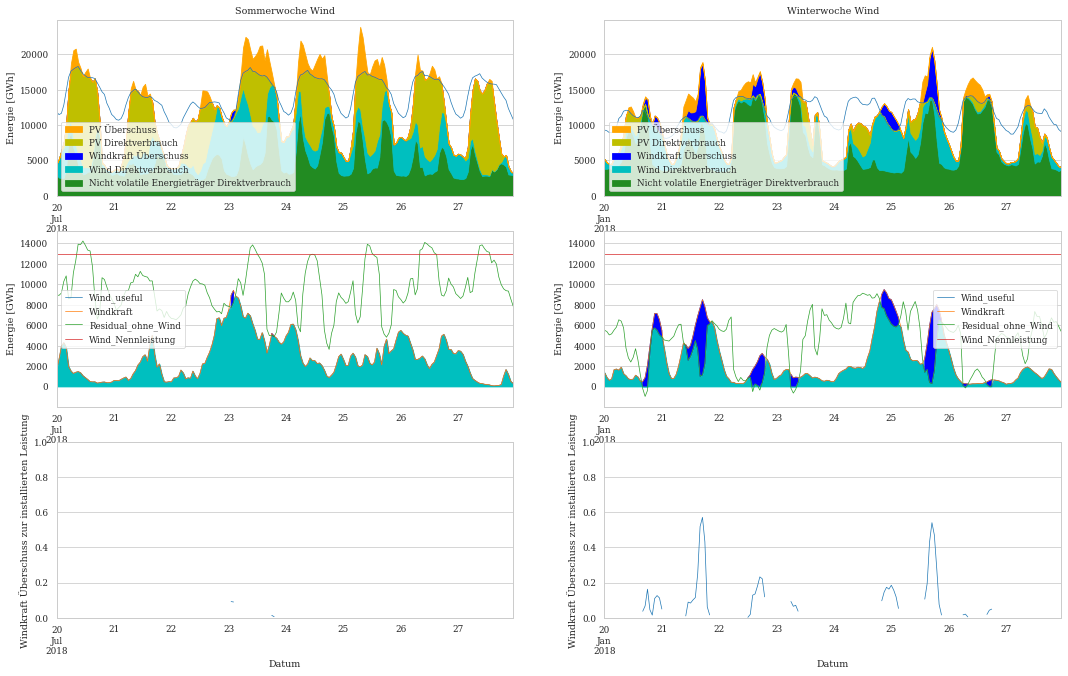

In [283]:
fig, ax = plot_analyse_WINDfirst(df2, summerweek_start=f"{em_year}-07-20", summerweek_stop= f"{em_year}-07-27", winterweek_start=f"{em_year}-01-20", winterweek_stop=f"{em_year}-01-27")
fig.savefig(f"../data/Plots/WIND_First_Vergleich_{em_year}.png", dpi=300, bbox_inches='tight')


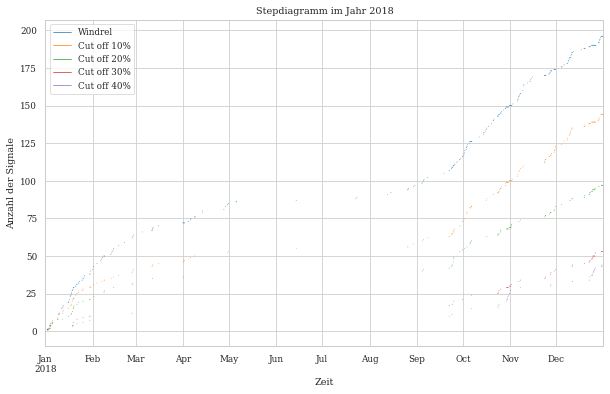

In [284]:
anzahl2 = pd.DataFrame()
cutoffs = 0.0001, 0.1, 0.2, 0.3, 0.4
for i, x in enumerate(cutoffs):
    sig2 = df2.Wind_rel.where(df2["Wind_rel"] > x)
    sig2 = pd.DataFrame(sig2)
    anzahl2[x] = sig2.count()
df2_sign_wind = pd.DataFrame()
df2_sign = pd.DataFrame()
df2_sign["Windrel"] = df2_windrel
df2_sign["Cut off 10%"] = df2_sign["Windrel"].where(df2_sign.Windrel > 0.1)
df2_sign["Cut off 20%"] = df2_sign["Windrel"].where(df2_sign.Windrel > 0.2)
df2_sign["Cut off 30%"] = df2_sign["Windrel"].where(df2_sign.Windrel > 0.3)
df2_sign["Cut off 40%"] = df2_sign["Windrel"].where(df2_sign.Windrel > 0.4)
#df2_sign["Cut off 50%"] = df2_sign["Windrel"].where(df2_sign.Windrel > 0.5)
#df2_sign["Cut off 60%"] = df2_sign["Windrel"].where(df2_sign.Windrel > 0.6)
df2_sign.fillna(0, inplace=True)
for c in df2_sign.columns:
    df2_sign[c] = df2_sign[c].map(lambda x: -1 if x == 0 else 1)
df2_step_wind = pd.DataFrame()
df2_not_wind = pd.DataFrame()

for c in df2_sign.columns:
    df2_step_wind[c] = df2_sign[c].shift(1).ne(df2_sign[c]).where(df2_sign[c] == 1).cumsum()
    df2_not_wind[c] = df2_sign[c].shift(1).ne(df2_sign[c]).where(df2_sign[c] == -1).cumsum()
df2_step_wind.iloc[0, :] = 0

fig, ax = plt.subplots()
df2_step_wind.plot(figsize=(10, 6), grid=True, ax=ax).set(title=f"Stepdiagramm im Jahr {em_year}", xlabel="Zeit", ylabel="Anzahl der Signale")
fig.savefig(f"../data/Plots/WIND_First_Stepdiagramm_{em_year}.png", dpi=300, bbox_inches='tight')

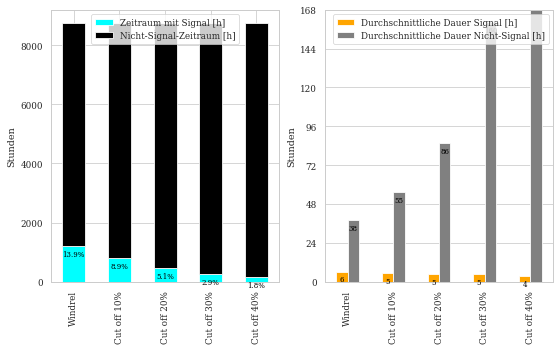

In [285]:
fig, ax = plot_signal_bars(df2_sign, df2_sign.columns, ytick_average_max=169, cut_ylim=168, figsize=(9,5))
fig.savefig(f"../data/Plots/WIND_First_Signaldiagramm_{em_year}.png", dpi=300, bbox_inches='tight')

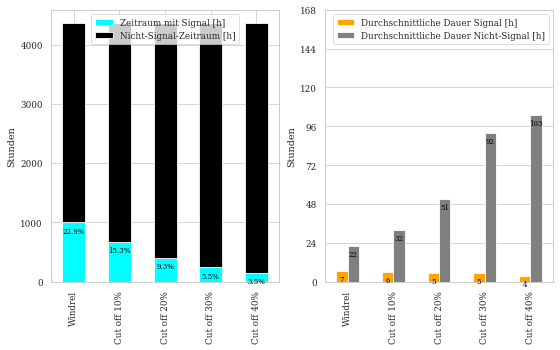

In [286]:
df2_wind_sign_s = df2_sign.loc[(df2_sign.index.month >= 4) & (df2_sign.index.month < 10)]
df2_wind_sign_w = df2_sign.loc[(df2_sign.index.month >= 10) | (df2_sign.index.month < 4)]
fig, ax = plot_signal_bars(df2_wind_sign_w, df2_wind_sign_w.columns, ytick_average_max=169, cut_ylim=168, figsize=(9, 5))
fig.savefig(f"../data/Plots/WIND_First_Signaldiagramm_{em_year}_w.png", dpi=300, bbox_inches='tight')

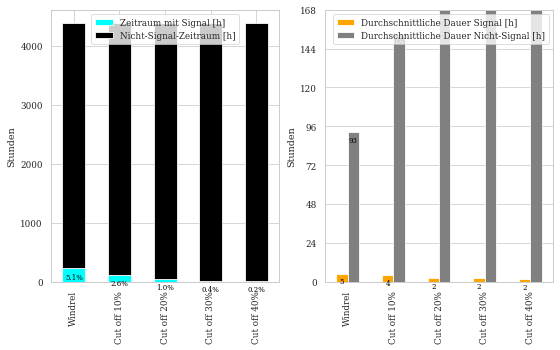

In [287]:
fig, ax = plot_signal_bars(df2_wind_sign_s, df2_wind_sign_s.columns, ytick_average_max=169, cut_ylim=168, figsize=(9, 5))
fig.savefig(f"../data/Plots/WIND_First_Signaldiagramm_{em_year}_s.png", dpi=300, bbox_inches='tight')

In [288]:
#fig, ax = plt.subplots()
#df2[["Windkraft", "WindkraftUeSch"]].resample("M").sum().plot(kind="bar", color=["orchid", "blue"], stacked=False, ax=ax, figsize=(12,5))
#for p in ax.patches:
#      ax.annotate("{:.0f}" .format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, -8), textcoords='offset points')

## ...

8760

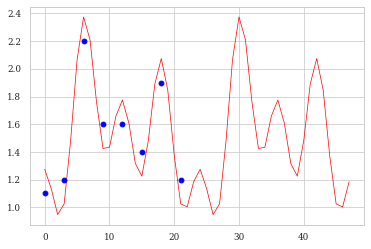

In [289]:
hscale = 24
p_day = np.array([1.1, 1.2, 2.2, 1.6, 1.6, 1.4, 1.9, 1.2])
day = traffo.transform(p_day, hour_scale=hscale)

x = np.arange(0, hscale, hscale/len(p_day))
xh = np.arange(0,8760,1)

plt.plot(xh[:hscale*2], day[:hscale*2], "r")
plt.plot(x[:hscale*2], p_day[:hscale*2], "bo")
len(day)

Wochenweise?

In [290]:
hscale = 168 # 7*24
8760 % 168

24

In [291]:
# Die Werte von „p_week“ geben die „Skalierung“ der Wochentage an. Das heißt, die vorher angegebenen Tageswerte skaliert werden. 1 bedeutet keine Skalierung den Defaultwerten des Tagesverlaufs.

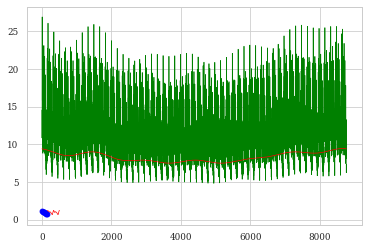

In [292]:
p_week = np.array([1.2, 1, 1, 1, 0.9, 0.7, 0.8]) # from monday to sunday
week = traffo.transform(p_week, hour_scale=hscale)

x = np.arange(0, hscale, hscale/len(p_week))
xh = np.arange(0,8760,1)

plt.plot(xh[:hscale*3], week[:hscale*3], "r")
plt.plot(x[:hscale*3], p_week[:hscale*3], "bo")
len(week)

example = week * day * s_year
plt.plot(xh, example, "g")
plt.plot(xh, s_year, "r-")

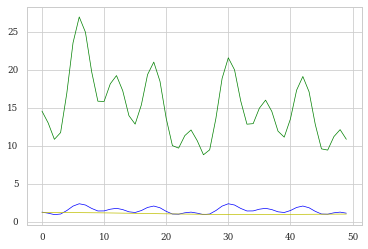

In [293]:
a,b = 0, 50
plt.plot(xh[a:b], example[a:b], "g")
plt.plot(xh[a:b], day[a:b], "b-")
plt.plot(xh[a:b], week[a:b], "y-")

Das scheint soweit zu funktionieren.

Ein Signal soll nun mehreren dieser Transformationen unterworfen werden können.
So kann eingestellt werden, wie sich der typische Tag der PV Produktion ändert,
wenn beispielsweise hauptsächlich Ost-West Anlagen mit typisch breiteren,
aber insgesamt niedrigeren Tagesprofilen modelliert werden sollen.
Ebenso der Strombedarf kann sowohl saisonal, als auch im Stundenmittel eines typischen Tags
 angepasst werden.

Dazu müssen lediglich die entsprechenden Skalierungsprofile aufmultipliziert werden
und das resultierende Signal normiert beziehungsweise auf die jährliche Zielgröße hin skaliert werden:



## Dashboard

In [294]:
# def_scaler_plot:

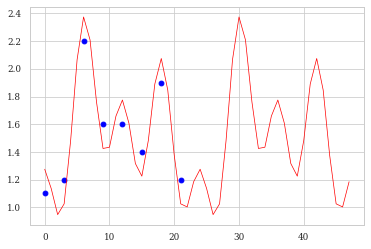

In [295]:
import panel as pn
import panel.widgets as pnw
from matplotlib.figure import Figure


def scaler_plot(scaler, support_points, hour_scale, view_scale=2):
    p, h = support_points, hour_scale

    x = np.arange(0, h, h/len(p))
    xh = np.arange(0,8760,1)

    fig = Figure()
    ax = fig.add_subplot()
    a, b = 0, int(h*view_scale)
    ax.plot(x[a:b], p[a:b], "bo")
    ax.plot(xh[a:b], scaler[a:b], "r")
    return fig

scaler_plot(day,p_day, 24)

In [296]:
# a number of sliders
N = 12
points = [pnw.FloatSlider(name='', value=1.0, start=0., end=3., step=0.05) for i in range(N)]

print(points)

[FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0), FloatSlider(end=3.0, step=0.05, value=1.0)]


Row
    [0] Column
        [0] Column
            [0] Markdown(str)
        [1] FloatSlider(end=3.0, step=0.05, value=1.0)
        [2] FloatSlider(end=3.0, step=0.05, value=1.0)
        [3] FloatSlider(end=3.0, step=0.05, value=1.0)
        [4] FloatSlider(end=3.0, step=0.05, value=1.0)
        [5] FloatSlider(end=3.0, step=0.05, value=1.0)
        [6] FloatSlider(end=3.0, step=0.05, value=1.0)
        [7] FloatSlider(end=3.0, step=0.05, value=1.0)
        [8] FloatSlider(end=3.0, step=0.05, value=1.0)
        [9] FloatSlider(end=3.0, step=0.05, value=1.0)
        [10] FloatSlider(end=3.0, step=0.05, value=1.0)
        [11] FloatSlider(end=3.0, step=0.05, value=1.0)
        [12] FloatSlider(end=3.0, step=0.05, value=1.0)
    [1] ParamFunction(function)
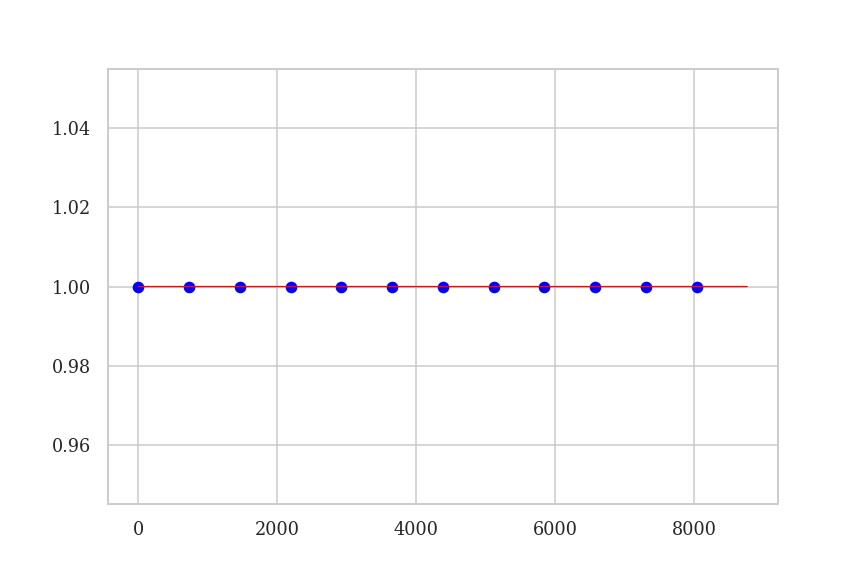

In [297]:
@pn.depends(*points)
def reactive_scalar(*points):
    p = [*points]
    s = traffo.transform(p)
    return scaler_plot(s, points, 8760)

widgets   = pn.Column("<br>\n# Reactive Scaler")
sliders = pn.Column(widgets, *points)
dashboard = pn.Row(sliders, reactive_scalar)

pn.extension()
pn.interact()
dashboard


Die Stützstellen lassen sich dynamisch festlegen und die resultierenden Profile anzeigen